#IMPORT GDRIVE

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


#IMPORT DATASET

In [220]:
import pandas as pd
import numpy as np


In [172]:
df = pd.read_csv("/content/gdrive/MyDrive/PROJECT/HIGHEST-PAID ATHLETES/HIGHEST.csv")

##DATA REVIEW

In [173]:
df.head()

,RANK,NAME,SPORT,TOTAL EARNINGS,ON-THE-FIELD EARNINGS,OFF-THE-FIELD EARNINGS
0,1.0,Lionel Messi,Soccer,$130M,$75M,$55M
1,2.0,LeBron James,Basketball,$121.2M,$41.2M,$80M
2,3.0,Cristiano Ronaldo,Soccer,$115M,$60M,$55M
3,4.0,Neymar,Soccer,$95M,$70M,$25M
4,5.0,Stephen Curry,Basketball,$92.8M,$45.8M,$47M


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   RANK                    50 non-null     float64
 1   NAME                    50 non-null     object 
 2    SPORT                  50 non-null     object 
 3    TOTAL EARNINGS         50 non-null     object 
 4    ON-THE-FIELD EARNINGS  50 non-null     object 
 5   OFF-THE-FIELD EARNINGS  50 non-null     object 
dtypes: float64(1), object(5)
memory usage: 2.5+ KB


In [175]:
for x in df.columns:
  print(x)

RANK
NAME
 SPORT
 TOTAL EARNINGS
 ON-THE-FIELD EARNINGS
OFF-THE-FIELD EARNINGS


#EARNINGS

Change the earnings columns from string to integer

In [176]:
df["OFF-THE-FIELD EARNINGS"][0].split('M')[0].split("$")[1]


'55'

In [177]:
"M" in df["OFF-THE-FIELD EARNINGS"][0]

True

In [178]:
def changetomillion(data_frame,column_name):
  for x in range(len(data_frame[column_name])):
    text = data_frame[column_name][x]
    if "M" in text:
      text = text.split('M')[0].split("$")[1]
      text = float(text)*100000
      text = int(text)
    elif "K" in text:
      text = text.split('K')[0].split("$")[1]
      text = float(text)*1000
    text = int(text)
    data_frame[column_name][x]=text

def column_select(data_frame):
  for x in data_frame.columns:
    if "EARNINGS" in x:
      changetomillion(data_frame,x)

In [179]:
column_select(df)

<ipython-input-178-1db5bdc5d35c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[column_name][x]=text


In [180]:
df.head()

,RANK,NAME,SPORT,TOTAL EARNINGS,ON-THE-FIELD EARNINGS,OFF-THE-FIELD EARNINGS
0,1.0,Lionel Messi,Soccer,13000000,7500000,5500000
1,2.0,LeBron James,Basketball,12120000,4120000,8000000
2,3.0,Cristiano Ronaldo,Soccer,11500000,6000000,5500000
3,4.0,Neymar,Soccer,9500000,7000000,2500000
4,5.0,Stephen Curry,Basketball,9280000,4580000,4700000


#SPORT COLUMN

There are some series that have different string but same value

In [181]:
df[" SPORT"].unique()

array(['Soccer', 'Basketball ', 'Basketball', 'Tennis', 'Boxing',
       ' Football', 'Football', ' Golf ', 'Auto Racing', ' Basketball',
       ' Basketball ', 'Baseball ', ' Golf', 'Mixed Martial Arts',
       'Football '], dtype=object)

In [182]:
for x in range(len(df[" SPORT"])):
  text = df[" SPORT"][x]
  if "Basketball" in text:
    df[" SPORT"][x] = "Basketball"
  elif "Football" in text:
    df[" SPORT"][x] = "Football"
  elif "Golf" in text:
    df[" SPORT"][x] = "Golf"

<ipython-input-182-e0381256db0c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[" SPORT"][x] = "Basketball"
<ipython-input-182-e0381256db0c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[" SPORT"][x] = "Football"
<ipython-input-182-e0381256db0c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[" SPORT"][x] = "Golf"


In [183]:
df[" SPORT"].unique()

array(['Soccer', 'Basketball', 'Tennis', 'Boxing', 'Football', 'Golf',
       'Auto Racing', 'Baseball ', 'Mixed Martial Arts'], dtype=object)

#VISUALIZATION

This section visualizes the atheletes earning based on the sport

In [192]:
df_sport = df.drop(columns=['RANK','NAME']).groupby(" SPORT") #dataframe groupping based on sport

In [221]:
df_sport_mean = df_sport.mean() #return the mean of columns based on sport
df_sport_mean

,TOTAL EARNINGS,ON-THE-FIELD EARNINGS,OFF-THE-FIELD EARNINGS
SPORT,,,
Auto Racing,5.650000e+06,5.150000e+06,5.000000e+05
Baseball,4.950000e+06,3.550000e+06,1.400000e+06
Basketball,5.993889e+06,3.849444e+06,2.169444e+06
Boxing,6.333333e+06,5.833333e+06,5.000000e+05
Football,5.122857e+06,4.249286e+06,9.250000e+05
Golf,5.160000e+06,3.733333e+05,4.800000e+06
Mixed Martial Arts,4.300000e+06,3.300000e+06,1.000000e+06
Soccer,8.560000e+06,5.200000e+06,3.360000e+06
Tennis,6.506667e+06,3.733333e+05,6.433333e+06


In [194]:
sport = [ x for x, df in df_sport] #return list that have same order with groupped dataframe
sport

['Auto Racing',
 'Baseball ',
 'Basketball',
 'Boxing',
 'Football',
 'Golf',
 'Mixed Martial Arts',
 'Soccer',
 'Tennis']

In [195]:
# for x,i in df_sport:
  # print(x,i)   #x is index while i is the dataframe

##BARPLOT GENERATION

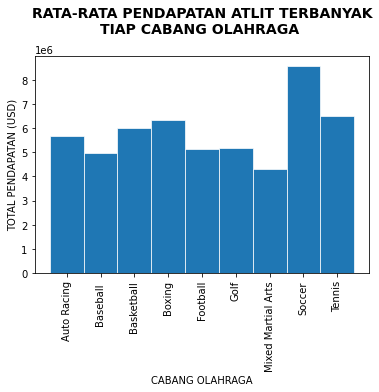

In [219]:
import matplotlib.pyplot as plt

x = sport
y = df_sport_mean[" TOTAL EARNINGS"]
judul = """RATA-RATA PENDAPATAN ATLIT TERBANYAK\nTIAP CABANG OLAHRAGA \n"""
fig, ax = plt.subplots()

ax.bar(x,y, width=1, edgecolor="white", linewidth=0.7)
ax.set_xlabel("CABANG OLAHRAGA")
ax.set_ylabel("TOTAL PENDAPATAN (USD)")
# ax.margins(1,1)
plt.xticks(x, rotation="vertical")
ax.set_title(judul, fontweight='bold', fontsize=14)



plt.show()